# La Habana, el latido de la isla

La capital de todos los cubanos bombea una mezcla vibrante de historia, cultura y, por supuesto, sabor. Sus bares y restaurantes no son solo lugares para comer y beber, sino que, además, son espacios donde se tejen historias, se comparten tradiciones y se celebra la vida. En ella resuena una vibración única y un ritmo que se siente en cada rincón de sus calles.

Por eso, este proyecto de ciencia de datos para evaluar las asignaturas de Programación e Introducción a la Ciencia de Datos busca desentrañar la esencia de ese latido, investigar este ecosistema vibrante y entender cómo dichos locales contribuyen a la identidad y el dinamismo de la ciudad.

In [13]:
import pandas as pd
import folium
import json
import glob
from modules.scripts.create_graphs import graph_percentage_pie

province_gj_data = json.load(open("./modules/files/lha_p.geojson", "r")) 
municipalities_gj_data = json.load(open("./modules/files/lha_m.geojson", "r"))

province_map = folium.Map(
    location=(23.0540698, -82.345189),
    zoom_start=9,
    max_zoom=11
)
folium.GeoJson(
    province_gj_data,
    zoom_on_click=True,
    style_function=lambda ft:{
        "fillColor": "purple",
        "color": "purple"
    }
).add_to(province_map)
data = []

for municip_json in glob.glob("./jsons/*"):
    df = pd.read_json(municip_json)
    for iRows in df.iterrows():
        data.append(
            {
                "name": iRows[1]["name"],
                "municipe": iRows[1]["municipe"],
                "latitude": iRows[1]["direction"]["coordinates"]["latitude"],
                "longitude": iRows[1]["direction"]["coordinates"]["longitude"],
                "type_of_food": iRows[1]["type_of_food"],
                "menu_av": iRows[1]["menu_availability"],
                "reservation": iRows[1]["reservation"],
                "delivery": iRows[1]["delivery"],
                "phys_money": iRows[1]["physical_money"],
                "transfer": iRows[1]["transfer"],
                "money": iRows[1]["money"],
                "percentage": iRows[1]["percentage"],
                "timetable": iRows[1]["timetable"],
                "menu": iRows[1]["menu"]["food"],
                "drinks": iRows[1]["menu"]["drinks"],
            }
        )

pd.DataFrame(data)

,name,municipe,latitude,longitude,type_of_food,menu_av,reservation,delivery,phys_money,transfer,money,percentage,timetable,menu,drinks
0,Atlanta,Arroyo Naranjo,23.075404,-82.358211,Variado,True,True,True,True,True,"{'cup': True, 'usd': False, 'euro': False}",0,"{'monday': {'start': '10:00', 'end': '22:00'},...","[{'name': 'Croquetas de la casa', 'price': 850...","[{'name': 'Chelada', 'price': 200, 'alcohol': ..."
1,Don Burguer,Arroyo Naranjo,23.075256,-82.358692,Americana,True,False,True,True,True,"{'cup': True, 'usd': False, 'euro': False}",5,"{'monday': {'start': '10:00', 'end': '23:00'},...","[{'name': 'Ensalada fria', 'price': 580, 'type...","[{'name': 'Agua natural', 'price': 150, 'alcoh..."
2,El Triangulo,Arroyo Naranjo,23.074388,-82.358446,Cubana,True,False,True,True,True,"{'cup': True, 'usd': False, 'euro': False}",0,"{'monday': {'start': '08:00', 'end': '12:00'},...","[{'name': 'Fajitas de pollo', 'price': 350, 't...","[{'name': 'Cerveza Cristal', 'price': 250, 'al..."
3,El Vaquerito,Arroyo Naranjo,23.004387,-82.327300,Criolla,True,True,False,True,True,"{'cup': True, 'usd': False, 'euro': False}",0,"{'monday': {'start': '11:00', 'end': '23:00'},...","[{'name': 'croquetas', 'price': 280.0, 'type':...","[{'name': 'cerveza de lata', 'price': 280.0, '..."
4,Que Chevere,Arroyo Naranjo,23.047269,-82.363057,Criolla,True,False,False,True,True,"{'cup': True, 'usd': False, 'euro': False}",0,"{'monday': {'start': '00:00', 'end': '00:00'},...","[{'name': 'picadera', 'price': 1600, 'type': '...","[{'name': 'cerveza cristal (lata)', 'price': 2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,GaraG,San Miguel del Padron,23.099425,-82.333447,Criolla,True,False,False,True,True,"{'cup': True, 'usd': False, 'euro': False}",0,"{'monday': {'start': '12:00', 'end': '00:00'},...","[{'name': 'picadera garag', 'price': 3500.0, '...",None
192,El Trafico,San Miguel del Padron,23.080238,-82.320836,Criolla,True,True,False,True,True,"{'cup': True, 'usd': False, 'euro': False}",0,"{'monday': {'start': '10:00', 'end': '22:00'},...","[{'name': 'tamal', 'price': 200.0, 'type': 'ap...",None
193,KY-13,San Miguel del Padron,23.079786,-82.320379,Criolla,True,False,True,True,True,"{'cup': True, 'usd': False, 'euro': False}",0,"{'monday': {'start': '10:00', 'end': '23:00'},...","[{'name': 'croquetas de queso', 'price': 600.0...",None
194,La Patrona,San Miguel del Padron,23.103022,-82.332299,Italiana,True,True,True,True,True,"{'cup': True, 'usd': False, 'euro': False}",0,"{'monday': {'start': '08:00', 'end': '00:00'},...","[{'name': 'hamburguesa clasica', 'price': 500....","[{'name': 'cafe express', 'price': 150.0, 'alc..."


### Revelación de los datos

Bien, como se pudo observar en el DataFrame, contamos con muchos datos enriquecedores que favorecerán nuestro análisis. Entre estos, tenemos algunos básicos, como lo son:

- Nombre del local ('name'): El cual nos servirá tanto para identificar e indexar nuestra información, como para utilizarlo en conjunto con otros datos, como pueden ser la latitud y la longitud.
- Municipio (municipe): Municipio al que pertenece el local
- Latitud y Longitud ("latitude", "longitude"): Ambos muy importantes, serán el pilar para mostrar donde se encuentran los locales.
- Tipo de cocina ("type_of_food"): La traducción del schema a lo que realmente es no es la más fiel, pero contiene un dato muy valioso, el cual nos permite conocer que tipo de cocina es la que se tiene en el restaurante/bar.

Luego pasamos a otros datos más interesantes:

- En la parte de servicios contamos con varios: 
    - Servicio de Menu físico ("menu_av"): Con este dato sabremos si tenemos disponibilidad de un menú en físico en el restaurante, o sea, si está hecho para comer en su interior.
    - Servicio de Reservación ("reservation"): Siempre nos hemos preguntado si un local tiene servicio de reservación, pues ya te lo contamos aquí.
    - Servicio de Domicilio ("delivery"): No quieres salir de casa, perfecto, conoce si existe el servicio a domicilio en ese local que te interesa
    - Acepta dinero en efectivo ("phys_money")
    - Acepta transferencias ("transfer")
- Monedas ("money"):
    - CUP ("cup"): Verificar si se acepta Moneda Nacional.
    - USD ("usd"): Verificar si se acepta moneda de Estados Unidos.
    - EURO ("euro"): Verificar si se acepta moneda de Europa.
- Cobro de porciento ("percentage"): Conoce si se te va a cobrar un servicio de porciento en algún local.
- Horarios ("timetable"): Que días y cuantas horas opera ese lugar al que deseas ir.
- Menu ("menu"): Comidas que ofrece el restaurante, desglosándose en varios tipos o categorías.
- Bebidas ("drinks"): Bebidas que ofrece el restaurante, dividiéndolas en si es o no es alcohólica.

Una vez conocidos todos los datos que se nos ofrecen al abrir y analizar el JSON mediante el DataFrame, podemos empezar a usar algunos de sus datos. Pero antes, vamos a ubicar geográficamente a La Habana para conocer todos los municipios que analizaremos.

In [14]:
province_map

Vale, pues La Habana se reparte en 15 municipios, los cuales contienen la cantidad necesaria de Bares y Restaurantes para que este análisis pudiera ser realizado, a continuación ubicaremos todos y cada uno de los restaurantes que tenemos disponibles, mostrando información de la que hablamos más arriba.

In [15]:
municipality_map = folium.Map(
    location=(23.0540698, -82.345189),
    zoom_start=11
)

folium.GeoJson(
    municipalities_gj_data,
    style_function=lambda ft: {
        "fillColor": "purple",
        "color": "purple"
    },
    zoom_on_click=True
).add_to(municipality_map)

def return_values(schema: dict):
    currency = []
    for name, value in schema.items():
        if value:
            currency.append(name.upper())
    
    return currency

for i in range(len(data)):
    folium.Marker(
        location=[data[i]["latitude"], data[i]["longitude"]],
        tooltip=f"""
        {data[i]["name"]}
        <br>
        Comida: {data[i]["type_of_food"]}
        <br>
        Moneda: {', '.join(return_values(data[i]["money"]))}
        <br>
        Horario de apertura y cierre:
        <br>
        Lunes: {data[i]["timetable"]["monday"]["start"]} - {data[i]["timetable"]["monday"]["end"]}
        <br>
        Martes: {data[i]["timetable"]["tuesday"]["start"]} - {data[i]["timetable"]["tuesday"]["end"]}
        <br>
        Miercoles: {data[i]["timetable"]["wednesday"]["start"]} - {data[i]["timetable"]["wednesday"]["end"]}
        <br>
        Jueves: {data[i]["timetable"]["thursday"]["start"]} - {data[i]["timetable"]["thursday"]["end"]}
        <br>
        Viernes: {data[i]["timetable"]["friday"]["start"]} - {data[i]["timetable"]["friday"]["end"]}
        <br>
        Sabado: {data[i]["timetable"]["saturday"]["start"]} - {data[i]["timetable"]["saturday"]["end"]}
        <br>
        Domingo: {data[i]["timetable"]["sunday"]["start"]} - {data[i]["timetable"]["sunday"]["end"]}"""
    ).add_to(municipality_map)

municipality_map

Perfecto, pues ahora tenemos un mapa, con los límites por cada municipio, cada restaurante/bar ubicado de forma exacta y, además, al interactuar con ellos, podemos ver información relevante que nos es de mucha ayuda.

Ahora, comencemos a graficar un poco, vamos a darle un toque de colores, gráficas de barras y pasteles a nuestro proyecto. Comencemos viendo qué cantidad de restaurantes y bares, en base a un 100%, cobran servicio de porcentaje; en todos los restaurantes que buscamos, no había muchos que cobraran este servicio, encontramos que cobraban del 10% y del 5%, no más, y aun así, no fueron muchos.

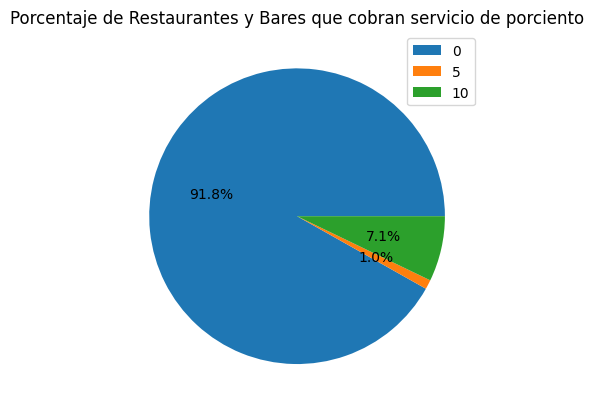

In [16]:
from collections import Counter #
percentages = []

for i in range(len(data)):
    percentages.append(data[i]["percentage"])


dict_frequences = Counter(percentages)

graph_percentage_pie(dict_frequences, "Porcentaje de Restaurantes y Bares que cobran servicio de porciento")

Se nota una clara y aplastante predominancia en cuanto a restaurantes que no cobran servicios de porcentaje se refiere, siendo estos más del 90%. Solo el 1% de los locales aplican un cargo del 5% y un 7.1% un cargo del 10%. Esto podría deberse a una fuerte tendencia de no aplicar cargos adicionales o a no estar en la cultura de los cubanos. Esto último es recalcable, ya que en varios lugares donde se preguntaba si se cobraba este servicio, su respuesta podía ser afirmativa o negativa, pero siempre decían cosas muy parecidas:

_"El cubano de a pie no está preparado para esto, no está adaptado a que se le cobre un servicio del 5% o del 10%, por tanto, esto va más dirigido a turistas que a los propios cubanos."_

_"No, ese servicio no se cobra aquí, eso es más para los restaurantes dedicados a la parte turista, pero esto es un restaurante para todo tipo de personas."_

_"Sí, aquí se cobra el 10% porque creemos que el servicio y la atención lo vale, no es algo que todo el mundo acepte, porque lo ven como algo nuevo, pero solo es nuevo en este país."_

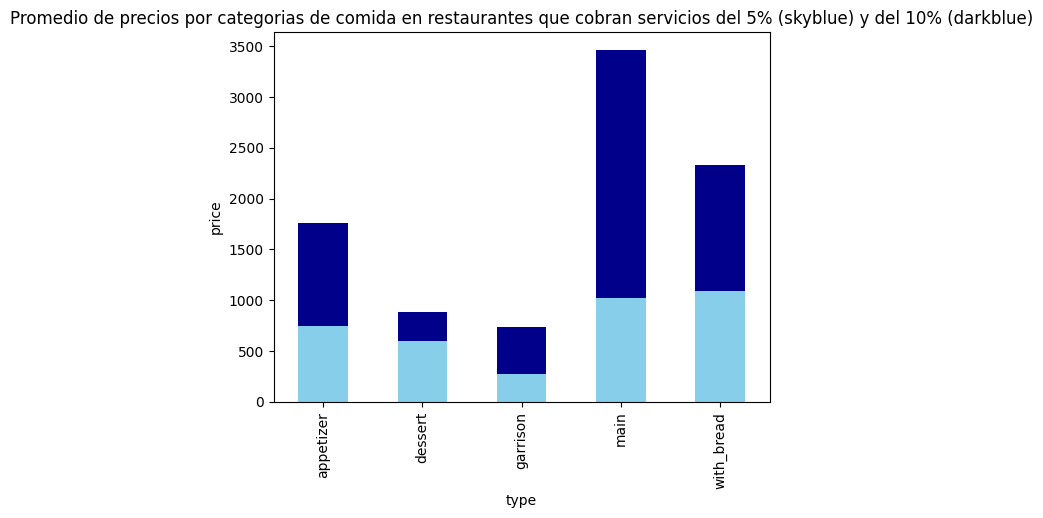

In [17]:
from modules.scripts.create_graphs import create_barplot_mean

create_barplot_mean(main_data=data,
                    item_schema="menu",
                    schema2Search="type",
                    title="categorias de comida",
                    color=["darkblue", "skyblue"])

Es increíble la diferencia que hay en el promedio de precios que se llevan entre los menús de los diferentes restaurantes que cobran 5% y 10%, donde los que cobran un 10% tienen precios en los platos principales (main) rozando los 3500 CUP. Esto es más del salario medio mensual de alguien que trabaje en Administración pública, defensa o seguridad social según la tabla de salarios medios mensuales dictada por la ONEI, pero no solo esta categoría es la que se defiende tras este promedio de precios, también le siguen el ritmo los entrantes (appetizer) y entrepanes (with_bread), sin llegar a un pico tan alto como los platos principales, pero sí sobrepasando los 1500 CUP.

Ahora, este mismo análisis, pero ¿qué tal si lo probamos con las bebidas? Ya sean alcohólicas y no alcohólicas.

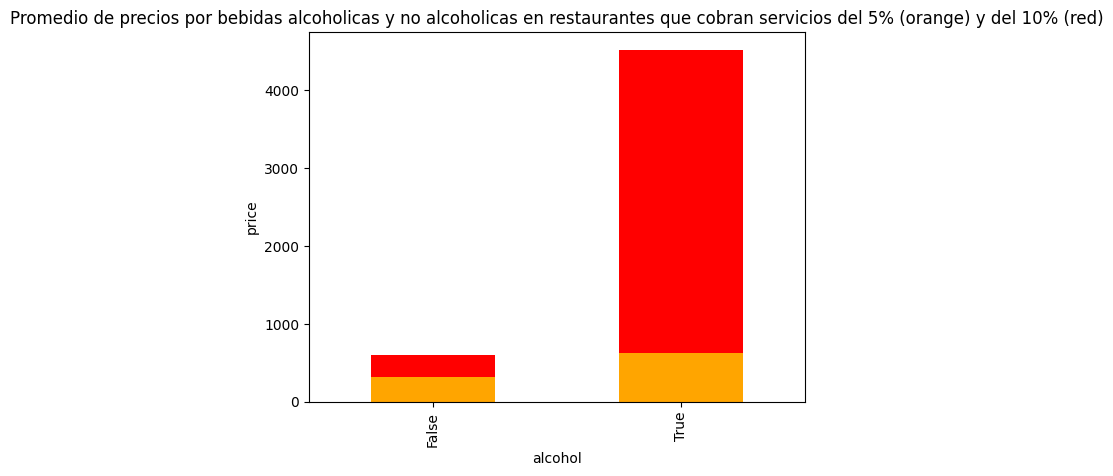

In [18]:
create_barplot_mean(main_data=data,
                    item_schema="drinks",
                    schema2Search="alcohol",
                    title="bebidas alcoholicas y no alcoholicas",
                    color=["red", "orange"])

Igual, volvemos a ver otra clara diferencia en los restaurantes que cobran un 10%, llevando la media de los precios de sus bebidas alcohólicas a un valor muy por encima al de las comidas. En el caso de las bebidas no alcohólicas vuelve a liderar, pero esta vez rozando los 1000 CUP de media. Con los restaurantes que cobran un 5%, tanto en comidas como en bebidas, se notan precios no muy altos, mostrando que, además de ser un local que cobre este tipo de servicios, está más hecho para el cubano de a pie.

### ¿Acaso los restaurantes sin este servicio tendrán mucha diferencia?

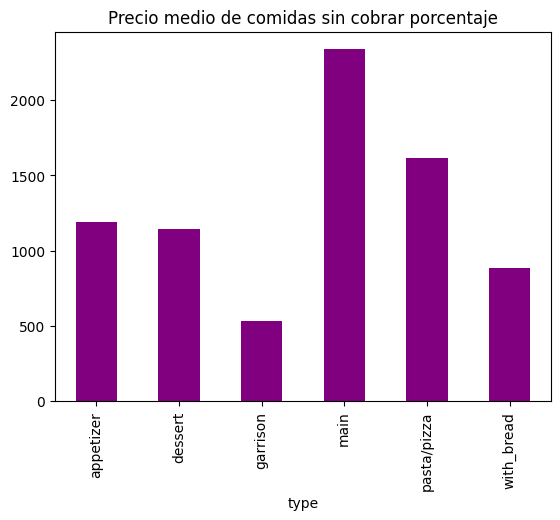

In [19]:
from modules.scripts.create_graphs import create_barplot_zero

create_barplot_zero(
    data=data,
    itemSchema="menu",
    schema2Search="type",
    title="Precio medio de comidas sin cobrar porcentaje",
    color="purple"
)

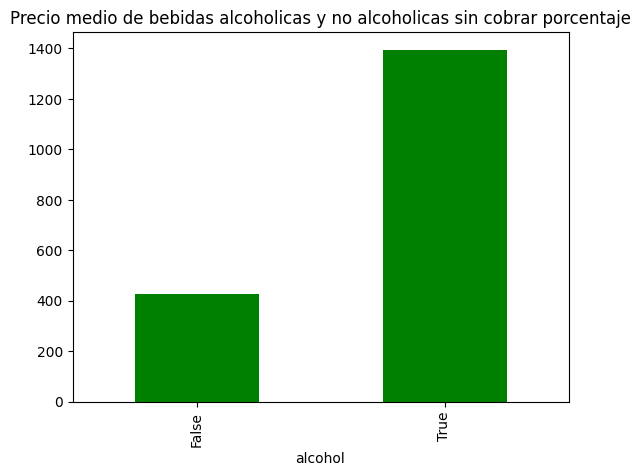

In [20]:
create_barplot_zero(
    data=data,
    itemSchema="drinks",
    schema2Search="alcohol",
    title="Precio medio de bebidas alcoholicas y no alcoholicas sin cobrar porcentaje",
    color="green"
)

En los restaurantes que no cobran este servicio seguimos viendo que los platos principales lideran la tabla, y pues claro, es normal, son el pilar de cualquier restaurante de comida Criolla/Internacional/Europea/Asiática, pero no llegan a un precio tan alto como los restaurantes que cobran el 10%. Por ejemplo, vemos que el precio medio de los platos principales sin cargo por servicio ronda los 2500, mientras que otras opciones como los postres (dessert) y entrantes (appetizer) se sitúan en una franja de 1300-1400. Llama la atención que las guarniciones (garrison) es la categoría de menor precio medio, teniendo un poco mas de 500, lo que sugiere que son acompañamientos más económicos. A pesar de ser considerada en algunos casos como un plato principal, las pastas y pizzas (pasta/pizza) tienen un valor medio bastante menor al principal, cerca de los 1700. Es interesante observar que la opción de los entrepanes/hamburguesas/sándwiches (with_bread) tiene un valor medio de alrededor de 800-1000, lo que puede indicar que se refiere a acompañamientos más modestos o a la inclusión del pan en platos que no lo requieren.

En el caso de las bebidas tampoco vemos esa exageración de precios, vemos algo más normal, algo más para todos los bolsillos de hoy en día, con las bebidas alcohólicas rozando ligeramente la media de los 1400 CUP y con las bebidas no alcohólicas un pequeño roce por encima de los 400 CUP.

### ¿Es más demandado el alcohol?

Cuba es bien reconocida por su esencia a la hora de crear azúcar, tabaco y alcohol, pues este último es fácil encontrarlo en casi todos los restaurantes de nuestro país, pero...¿En serio es mas abundante el alcohol en los restaurantes? Veamos:

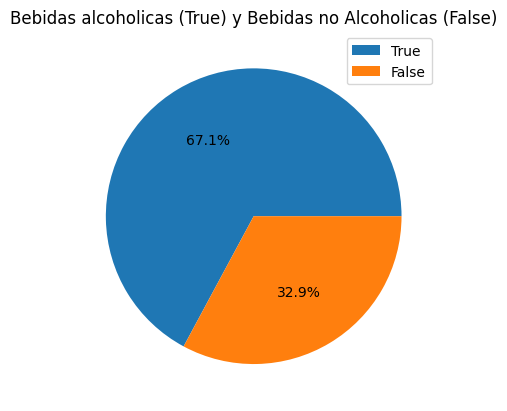

In [21]:
drinks = []

for item in data:
    if item.get("drinks") is not None and 'Cocteleria' not in item.get('type_of_food'):
        for itemObtained in item.get("drinks"):
            drinks.append(itemObtained["alcohol"])

drinks_frequence = Counter(drinks)

graph_percentage_pie(drinks_frequence, "Bebidas alcoholicas (True) y Bebidas no Alcoholicas (False)")

Pues para este análisis se han tomado en cuenta 2 cosas: la primera son los restaurantes que sí o sí sirvieran bebidas, ya que nos encontramos sitios como San Miguel del Padrón, que muchos de sus establecimientos no vendían ningún tipo de bebida, y la otra es que solo vamos a tomar en cuenta los locales que no tuvieran en su tipo de cocina la categoría 'Coctelería', pues es algo lógico, los bares de cócteles se centran inherentemente en las bebidas alcohólicas; dándonos que el porcentaje por parte de las bebidas alcohólicas sería muchísimo mayor, mostrando desigualdad y evitando un resultado justo.

Pues bien, notamos que el porcentaje de bebidas alcohólicas es alto, pero bastante justo, ya que la variabilidad de las bebidas es muchísimo mayor por la parte alcohólica, que en la no alcohólica; no quiere decir que existan menos bebidas no alcohólicas que alcohólicas, no, simplemente es que los restaurantes, la mayoría, tienden a tener las mismas bebidas no alcohólicas (Refrescos Nacional/Importado, Maltas, Energizantes, Jugos, Batidos, Smoothies) mientras que en las bebidas alcohólicas existe un extenso catálogo. La gran variedad de opciones alcohólicas ofrecidas crea una impresión de mayor presencia alcohólica, incluso si el número total de elementos no alcohólicos es comparable.

### Las Transferencias han llegado para quedarse

En cada conversación sobre restaurantes/bares con algún familiar, amigo, o incluso con personas en la calle, ha salido a flote el tema de lo popular que se han vuelto las transferencias en nuestro país últimamente. Por tanto, me cuestioné en este proyecto qué tan popular es el uso de las transferencias en cada municipio de La Habana hoy en día, aunque ¿por qué trabajar solo con las transferencias? ¿Por qué no hablar incluso de las reservaciones o las entregas a domicilio, o las tres?

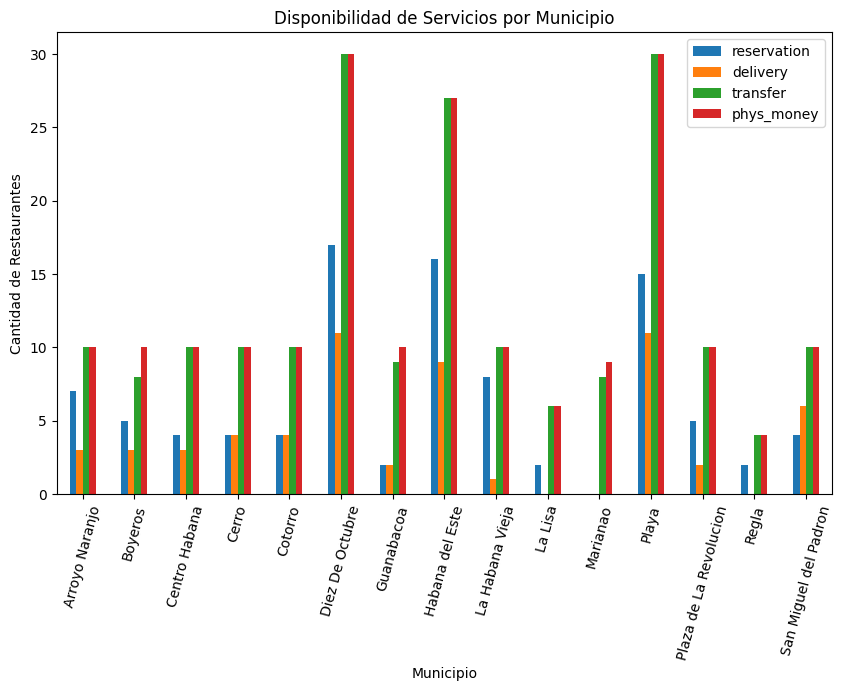

In [22]:
from modules.scripts.create_graphs import compare_service_availability 

service_columns = ['reservation', 'delivery', 'transfer', "phys_money"]
compare_service_availability(pd.DataFrame(data), service_columns)

Perfecto, pues como pudimos observar, la capital cuenta en casi todos sus municipios con los servicios de reservación, transferencias y domicilio. Tenemos los casos atípicos como La Lisa y Regla, donde no existen opciones de domicilio, en Marianao solo contamos con la facilidad de los pagos mediante transferencias. (Cabe decir que todos y cada uno de estos lugares aceptan pago en efectivo (phys_money) por lo que esta categoría solo se utilizó para comparar contra los que aceptan transferencia).

Hay algo ligeramente notable, y es la cantidad de restaurantes/bares que cuentan con servicio de domicilio. Al parecer no es algo muy común, y en lugares como La Habana Vieja es normal, pues es un lugar enriquecido por la historia de sus calles, lo ideal es salir a disfrutarla.

###

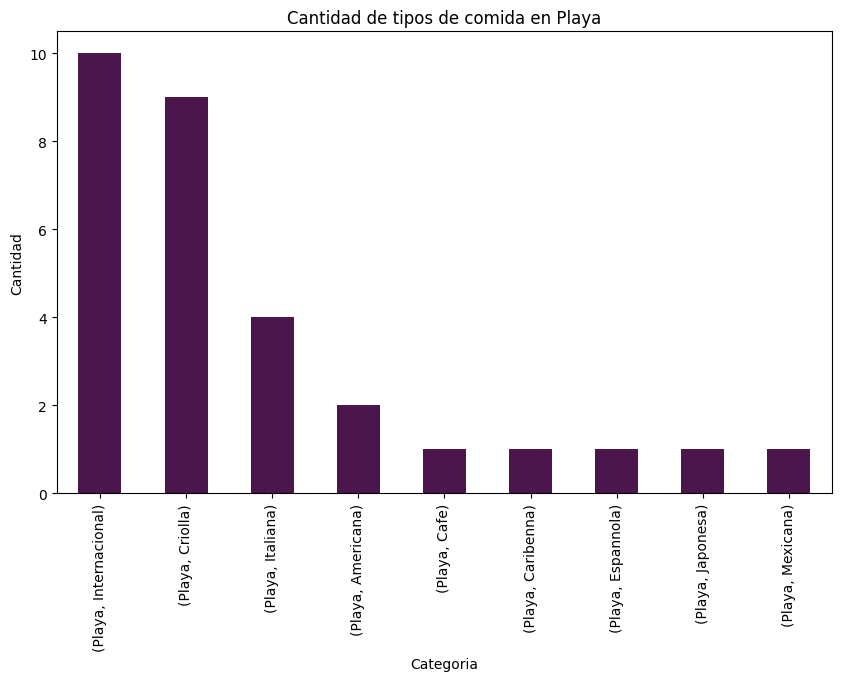

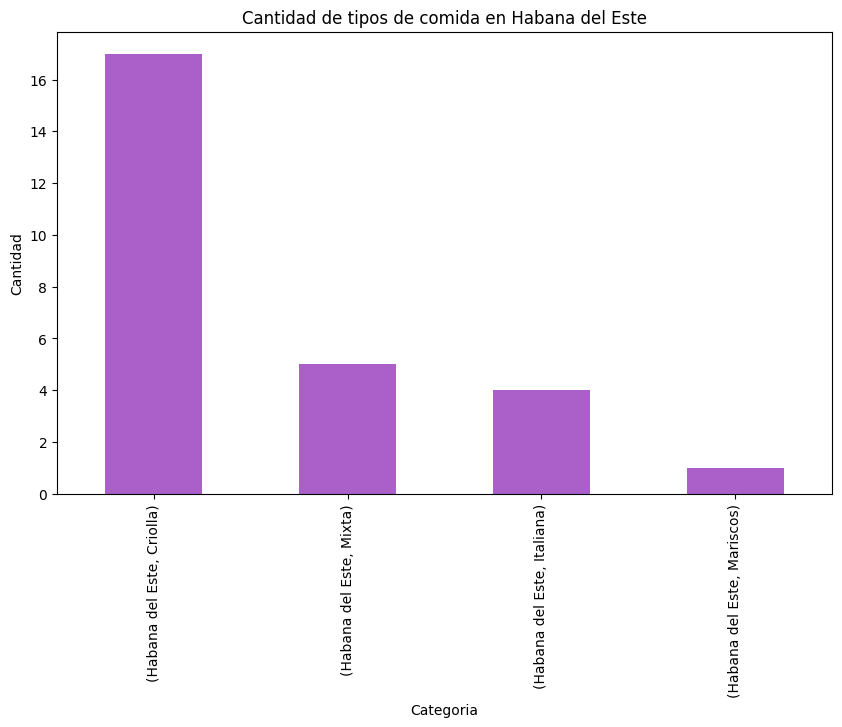

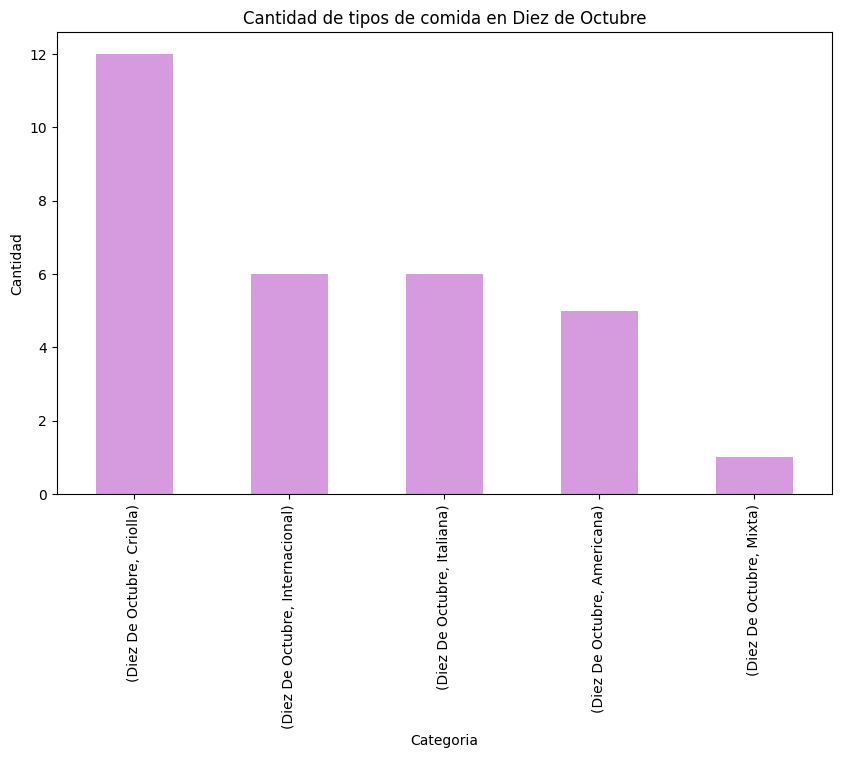

In [23]:
import matplotlib.pyplot as plt
import pandas as pd


municipalities = ["Playa", "Habana del Este", "Diez De Octubre"]
filtered_municipalities = []
food_playa = []
food_habana_este = []
food_diez_octubre = []


for i in range(len(data)):
    if data[i]["municipe"] in municipalities:
        filtered_municipalities.append(data[i])


for j in range(len(filtered_municipalities)):
    if filtered_municipalities[j]["municipe"] == "Playa":
        food_playa.append(
            {
                "municipality": filtered_municipalities[j]["municipe"],
                "type_of_food": filtered_municipalities[j]["type_of_food"]
            }
        )
    elif filtered_municipalities[j]["municipe"] == "Habana del Este":
        food_habana_este.append(
            {
                "municipality": filtered_municipalities[j]["municipe"],
                "type_of_food": filtered_municipalities[j]["type_of_food"]
            }
        )
    else:
        food_diez_octubre.append(
            {
                "municipality": filtered_municipalities[j]["municipe"],
                "type_of_food": filtered_municipalities[j]["type_of_food"]
            }
        )


df_food_playa = pd.DataFrame(food_playa)
df_food_habana_este = pd.DataFrame(food_habana_este)
df_food_diez_octubre = pd.DataFrame(food_diez_octubre)


count_playa = df_food_playa.groupby("municipality")["type_of_food"].value_counts()
count_habana_este = df_food_habana_este.groupby("municipality")["type_of_food"].value_counts()
count_diez_octubre = df_food_diez_octubre.groupby("municipality")["type_of_food"].value_counts()


count_playa.plot(kind="bar", figsize=(10, 6), color="#4B164C")
plt.title("Cantidad de tipos de comida en Playa")
plt.xlabel("Categoria")
plt.ylabel("Cantidad")
plt.show()


count_habana_este.plot(kind="bar", figsize=(10, 6), color="#AA60C8")
plt.title("Cantidad de tipos de comida en Habana del Este")
plt.xlabel("Categoria")
plt.ylabel("Cantidad")
plt.show()


count_diez_octubre.plot(kind="bar", figsize=(10, 6), color="#D69ADE")
plt.title("Cantidad de tipos de comida en Diez de Octubre")
plt.xlabel("Categoria")
plt.ylabel("Cantidad")
plt.show()

Aquí podemos apreciar la variedad de tipos de comida quwe existen en los tres municipios de Playa, Habana del Este y Diez de Octubre.

En Playa observamos como predomina la comida Internacional, donde por su ubicación era de esperar, ya que es una zona donde la mayoría de sus habitantes se encuentran en una buena posición salarial y desean probar algo más allá de la comida de su país. En cambio la predominancia de la comida criolla en Habana del Este y Diez de Octubre podría estar relacionada con la fuerte identidad cultural y el apego a las tradiciones familiares, donde la cocina que se transmite de generación en generación sigue siendo un pilar fundamental. Además, la oferta gastronómica en estas áreas podría estar más enfocada en satisfacer las necesidades y preferencias de la población local, con precios más accesibles y platos tradicionales más adaptados a los ingredientes de la rigión. Sin embargo al observar las gráficas, notamos que la comida italiana tiene una presencia significativa en los tres municipios, lo que sugiere una aceptación generalizada de esta cocina, posiblemente debido a su relativa accesibilidad y a la familiaridad de algunos de sus platos. 

In [24]:
pizzas = []


DO = []
HE = []
PY = []

for i in range(len(data)):
    for j in  data[i]["menu"]:
        if data[i].get("menu") is not None:
            if j["type"] == "pasta/pizza":
                if j["name"].startswith("pizza"):                    
                    if data[i]["municipe"] == "Habana del Este":
                        HE.append(
                            {
                                "name": j["name"],
                                "price": j["price"]
                            }
                        )
                    elif data[i]["municipe"] == "Diez De Octubre":
                        DO.append(
                            {
                                "name": j["name"],
                                "price": j["price"]
                            }
                        )                    
                    elif data[i]["municipe"] == "Playa":
                        PY.append(
                            {
                                "name": j["name"],
                                "price": j["price"]
                            }
                        )


display("Diez De Octubre: ",pd.DataFrame(DO).groupby("name")["price"].mean().sort_values())
display("Habana del Este: ",pd.DataFrame(HE).groupby("name")["price"].mean().sort_values())
display("Playa: ",pd.DataFrame(PY).groupby("name")["price"].mean().sort_values())


'Diez De Octubre: '

name
pizza pequenna de queso blanco             200.0
pizza pequenna queso gouda                 300.0
pizza grande de queso blanco               400.0
pizza pequenna queso blanco hawaiana       400.0
pizza pequenna queso gouda hawaiana        450.0
pizza grande de queso blanco hawaiana      550.0
pizza pequenna especial 'la esquinita'     600.0
pizza grande de queso gouda                650.0
pizza grande de queso gouda hawaiana       800.0
pizza napolitana                           980.0
pizza de queso                            1030.0
pizza con cebolla                         1080.0
pizza grande especial 'la esquinita'      1200.0
pizza de cebolla                          1210.0
pizza de pimientos                        1210.0
pizza con jamón                           1220.0
pizza de jamón                            1250.0
pizza de chorizo                          1250.0
pizza hawaiana                            1250.0
pizza con chorizo                         1280.0
pizza napolitan

'Habana del Este: '

name
pizza de queso blanco                             160.000000
pizza de queso gouda                              250.000000
pizza bambina                                     550.000000
pizza napolitana queso mozarella                  610.000000
pizza napolitana queso gouda                      760.000000
pizza napolitana                                 1223.333333
pizza de queso                                   1250.000000
pizza hawaiana                                   1490.000000
pizza de jamon                                   1550.000000
pizza de ropa vieja y platanos maduros fritos    1890.000000
pizza al campestre                               1960.000000
pizza de camarones                               1990.000000
Name: price, dtype: float64

'Playa: '

name
pizza cubana          400.0
pizza cebolla         750.0
pizza de pollo        800.0
pizza vegetales       800.0
pizza de chorizo      925.0
                      ...  
pizza mammamia       5000.0
pizza della nonna    5200.0
pizza de bolonia     5400.0
pizza romagnola      5800.0
pizza new york       6000.0
Name: price, Length: 68, dtype: float64

Wooww! Al ejecutar el código, podemos observar que los precios de las pizzas en los municipios de Playa, Habana del Este y Diez de Octubre varían de manera significativa. Los resultados revelan una amplia gama de precios, que oscilan entre 200 pesos y 6000 pesos, lo que indica las diferentes opciones de pizza que se ofrecen en cada lugar. Por ejemplo, en Habana del Este, algunas pizzas son más asequibles, mientras que en Playa, ciertas pizzas de alta gama alcanzan precios bastante elevados, como la "pizza new york" que cuesta 6000 pesos. Esta variación en los precios podría estar relacionada con factores como los ingredientes utilizados, el tamaño de las pizzas o incluso la popularidad de los restaurantes en cada área. En resumen, al analizar los DataFrames generados, es claro que los precios son bastante variables, lo que refleja la diversidad de opciones de pizzas disponibles en cada municipio. ¡Es fascinante observar cómo se distribuyen los precios en estas zonas!

Al examinar los datos que juntamos, nos encontramos con un montón de información. Para que todo esto tenga sentido, lo resumimos y lo mostramos de forma visual, con gráficos, mapas, tablas. De esta manera, y con la fuerza de los datos que no mienten, pudimos responder a esas preguntas que teníamos. En el análisis de los establecimientos con servicios de porcentaje se pudo deducir que en la provincia aún se mantiene la ideología de que el cliente paga por una comida, y el servicio obtendrá propina solo si el consumidor desea entregarla; se logró mostrar la información estadística en base a comida y bebidas sobre los restaurantes que cobran este tipo de servicios, y también en los que no, mostrando de una forma absurdamente grande la diferencia de precios entre ambos tipos de servicios. Se analizó y se comparó la abundancia de bebidas alcohólicas y no alcohólicas en los establecimientos, siguiendo normas que hicieran más justa la comparación, tambíen análisis de los diferentes tipos de servicios ofrecidos en todos y cada uno de los municipios de La Habana, evaluando las múltiples opciones que faltan o que sobran en los municipios. Además se analizó la variedad de tipos de comida por los municipios de treita restaurantes y por último analisamos la variedad de precios de las pizzas en dichos municipios. 